# KEN3450 Data Analysis - Data Madness Assignment

***Collaborators:*** 
Malte Dührsen, 
Ahmad Mohammad, 
Philip Muehlenfeld

## Table of Contents

* ### [1. Introduction](#introduction) 
* ### [2. The Dataset](#the_dataset) 
 - #### [2.1 Importing Data](#importing_data)
 - #### [2.2 Cleaning Data](#cleaning_data)  
 - #### [2.1 Description of Variables](#variable_description)
* ### [3. Analysis](#analysis)
 - #### [3.1 EDA](#eda)
   + ##### [3.1.1 Are developing countries less affected by the Covid-19 pandemic?](#3.1.1)
   + ##### [3.1.1 What are the root-causes for this observation?](#3.1.2)
 - #### [3.1 Inferential Statistics](#inferential_stats)
* ### [4. Conclusion](#conclusion)
* ### [5. Ethical Consideration](#ethics)

## 1.Introduction <a id='introduction'></a>

The Covid-19 pandemic has severely affected people’s everyday lives in all parts of the world over the past year. As of March 21, 2021, approximately 123 million people have been infected with the virus and 2.8 million have died. This makes the coronavirus pandemic one of the deadliest in human history. <br>
While Covid-19 is a global pandemic that has spread to all countries worldwide, one can still observe significant differences in the number of cases and deaths between them. In particular, it has been repeatedly pointed out that developing countries seem to have been less affected by the virus than developed nations. [[1]](https://www.indepthnews.net/index.php/sustainability/health-well-being/3923-covid-19-europeans-can-learn-from-developing-countries) [[2]](https://foreignpolicy.com/2020/09/02/the-developing-world-could-come-out-of-the-pandemic-ahead/) [[3]](https://theconversation.com/what-developing-countries-can-teach-rich-countries-about-how-to-respond-to-a-pandemic-146784) [[4]](https://www.brookings.edu/blog/future-development/2020/05/05/the-unreal-dichotomy-in-covid-19-mortality-between-high-income-and-developing-countries/) [[5]](https://globalnews.ca/news/7240320/data-and-demographics-is-the-covid-19-death-rate-lower-in-the-developing-world/). In our analysis, we attempt to investigate this widely quoted opinion and find the root-causes that lead to such differences.  

## 2. The Dataset <a id='the_dataset'></a>

The dataset was downloaded from https://ourworldindata.org/coronavirus-source-data. The dataset is published by Our World In Data, a scientific online publication based at Oxford University. Our World in Data is a project of the Global Change Data Lab. 
<br />

### 2.1 Importing Data <a id='importing_data'></a>

In [37]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sn

import statsmodels.formula.api as sm

#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [38]:
covid_data = pd.read_csv('owid-covid-data.csv') #load dataset

### 2.2 Cleaning Data <a id='cleaning_data'></a>

First, we are doing some basic cleaning in order to prepare the dataset for the analysis:

In [39]:
# exclude continents from 'location' column
excl = ['Europe', 'European Union', 'North America', 'South America', 'World', 'Asia', 'Africa', 'Oceania', 'World']
covid_data = covid_data[~covid_data['location'].isin(excl)]
covid_data = covid_data.reset_index(drop = True)

# excluding all irrelevant columns
covid_data = covid_data[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million','reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand' ,'new_tests_per_thousand','positive_rate', 'total_vaccinations' ,'new_vaccinations' ,'total_vaccinations_per_hundred', 'stringency_index', 'population','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy','human_development_index']]

Next, we create a new classification based on the human development index (HDI). We divide the dataset into low HDI, medium HDI, high HDI, and very high HDI countries. The cutoff values for this classification are the following:

1. Very high HDI (0.8-1) 
2. High HDI (0.7-0.799) 
3. Medium HDI (0.550-0.699) 
4. Low HDI (0.350-0.549)

This approach is adopted from the UN's Human Development Report 2020 (source: http://hdr.undp.org/sites/default/files/hdr2020.pdf). It will later allow us to compare the differences in the scale of the Covid-19 outbreak between countries of differing development statuses.

In [40]:
#creating masks based on human development index
low_hdi = covid_data['human_development_index'] < 0.55
medium_hdi = (covid_data['human_development_index'] >= 0.55) & (covid_data['human_development_index'] < 0.7)
high_hdi = (covid_data['human_development_index'] >= 0.7) & (covid_data['human_development_index'] < 0.8)
vhigh_hdi = (covid_data['human_development_index'] >= 0.8) & (covid_data['human_development_index'] <= 1)

#creating additional column to implement the new classification
covid_data['hdi_class'] = covid_data['human_development_index']

#actually implementing the new clasification
covid_data.loc[low_hdi,'hdi_class'] = 1
covid_data.loc[medium_hdi,'hdi_class'] = 2
covid_data.loc[high_hdi,'hdi_class'] = 3
covid_data.loc[vhigh_hdi,'hdi_class'] = 4

Here a visualization of the Human Development Index (light green: low HDI, dark green: high HDI):


![](2020_UN_Human_Development_Report.png)
    
    

### 2.3 Description of Variables <a id='variable_description'></a>

In [41]:
covid_data

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,hdi_class
0,Afghanistan,24.02.20,1.0,1.0,NaN,NaN,0.026,0.026,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1.0
1,Afghanistan,25.02.20,1.0,0.0,NaN,NaN,0.026,0.000,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1.0
2,Afghanistan,26.02.20,1.0,0.0,NaN,NaN,0.026,0.000,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1.0
3,Afghanistan,27.02.20,1.0,0.0,NaN,NaN,0.026,0.000,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1.0
4,Afghanistan,28.02.20,1.0,0.0,NaN,NaN,0.026,0.000,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67321,Zimbabwe,17.02.21,35423.0,108.0,1418.0,4.0,2383.313,7.266,95.405,0.269,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,2.0
67322,Zimbabwe,18.02.21,35543.0,120.0,1420.0,2.0,2391.386,8.074,95.540,0.135,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,2.0
67323,Zimbabwe,19.02.21,35710.0,167.0,1430.0,10.0,2402.622,11.236,96.213,0.673,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,2.0
67324,Zimbabwe,20.02.21,35768.0,58.0,1432.0,2.0,2406.525,3.902,96.347,0.135,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,2.0


The dataset 'covid_data' consists of 67,326 entries each of which is measured along 40 variables. The following list provides an interpretation of those variables for your better understanding:

| Variable | Description |
| :- | :-| 
|'location':| geographical location
'date': | Date of observation
'total_cases': | Total confirmed cases of COVID-19
'new_cases': | New confirmed cases of COVID-19
'total_deaths': | Total deaths attributed to COVID-19
'new_deaths': | New deaths attributed to COVID-19
'total_cases_per_million': | Total confirmed cases of COVID-19 per 1,000,000 people
'new_cases_per_million': |  New confirmed cases of COVID-19 per 1,000,000 people
'total_deaths_per_million': | Total deaths attributed to COVID-19 per 1,000,000 people
'new_deaths_per_million': | New deaths attributed to COVID-19 per 1,000,000 people
'reproduction_rate': | Real-time estimate of the effective reproduction rate (R) of COVID-19. See https://github.com/crondonm/TrackingR/tree/main/Estimates-Database
'icu_patients': | Number of COVID-19 patients in intensive care units (ICUs) on a given day
'icu_patients_per_million': | Number of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people
'hosp_patients': | Number of COVID-19 patients in hospital on a given day
'hosp_patients_per_million': | Number of COVID-19 patients in hospital on a given day per 1,000,000 people
'new_tests': | New tests for COVID-19 (only calculated for consecutive days)
'total_tests': | Total tests for COVID-19
'total_tests_per_thousand': | Total tests for COVID-19 per 1,000 people
'new_tests_per_thousand': | New tests for COVID-19 per 1,000 people
'positive_rate': | The share of COVID-19 tests that are positive, given as a rolling 7-day average (this is the inverse of tests_per_case)
'total_vaccinations': | Total number of COVID-19 vaccination doses administered
'new_vaccinations': | New COVID-19 vaccination doses administered (only calculated for consecutive days)
'total_vaccinations_per_hundred': | Total number of COVID-19 vaccination doses administered per 100 people in the total population
'stringency_index': | Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)
'population': | Population in 2020
'population_density': | Number of people divided by land area, measured in square kilometers, most recent year available
'median_age': | Median age of the population, UN projection for 2020
'aged_65_older': | Share of the population that is 65 years and older, most recent year available
'aged_70_older': | Share of the population that is 70 years and older in 2015
'gdp_per_capita': | Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available
'extreme_poverty': | Share of the population living in extreme poverty, most recent year available since 2010
'cardiovasc_death_rate': | Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)
'diabetes_prevalence': | Diabetes prevalence (% of population aged 20 to 79) in 2017
'female_smokers': | Share of women who smoke, most recent year available
'male_smokers': | Share of men who smoke, most recent year available
'handwashing_facilities':  | Share of the population with basic handwashing facilities on premises, most recent year available
'hospital_beds_per_thousand': | Hospital beds per 1,000 people, most recent year available since 2010
'life_expectancy': | Life expectancy at birth in 2019
'human_development_index': | A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living.
'hdi_class': | classification based on the human development index. Extensively discussed above


<br>









## 3. Analysis <a id='analysis'></a>

As stated in the introduction, the analysis revolves around two main questions:
1. Is it actually correct that developing countries are less affected by the pandemic than developed countries, and
2. if so, what are the root-causes for this observation?

### 3.1 EDA <a id='eda'></a>

#### 3.1.1 Are developing countries less affected by the Covid-19 pandemic? <a id='3.1.1'></a>

In [2.2 Cleaning](#cleaning_data) data we have already established a new variable `hdi_class` to classify the development level of a country. Now, we also need to decide on the variable to compare `hdi_class` with, in order to decide whether there actually is a significant difference in the magnitude to which developing and developed countries have been affected by the pandemic. It is also important to point out that we are interested in the effect of the virus itself and not any effects resulting from the lockdowns or other restrictions that were put in place by most governments. <br> <br>
Thus, we can use the following variables to compare the effects of the pandemic on developing vs. developed nations:

`['total_cases_per_million', 'total_deaths_per_million', 'icu_patients_per_million', 'hosp_patients_per_million']`

Here we are deliberately not using the absolute numbers but X per million, to account for the population size differences between the countries.


We start by comparing `hdi_class` on `total_cases_per_million`:

<a id='boxplot1'></a>

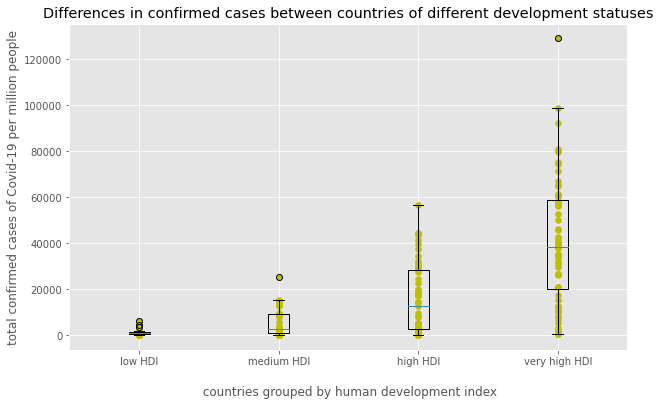

,count,mean,std,min,25%,50%,75%,max
hdi_class,,,,,,,,
1.0,33.0,1101.732030,1249.714381,8.521,384.3660,688.4900,1262.50000,6004.036
2.0,36.0,5303.341028,6084.875936,3.256,909.2985,2529.4125,9008.93000,25356.662
3.0,51.0,15817.684510,15362.531685,10.080,2412.7715,12436.4450,28173.54250,56387.042
4.0,64.0,40560.599172,27413.278417,411.445,19991.5965,38214.4035,58851.08025,129062.318


In [42]:
# choose a recent date at which to compare the data
covid_data_case = covid_data[covid_data['date']== '01.02.21']

# exclude NaN values
covid_data_case = covid_data_case[covid_data_case['hdi_class'].notna()]
covid_data_case = covid_data_case[covid_data_case['total_cases_per_million'].notna()]

# create boxplot
plt.figure(figsize = (10,6))
plt.boxplot(covid_data_case.loc[covid_data_case['hdi_class']==1,'total_cases_per_million'],positions = [1])
plt.boxplot(covid_data_case.loc[covid_data_case['hdi_class']==2,'total_cases_per_million'],positions = [2])
plt.boxplot(covid_data_case.loc[covid_data_case['hdi_class']==3,'total_cases_per_million'],positions = [3])
plt.boxplot(covid_data_case.loc[covid_data_case['hdi_class']==4,'total_cases_per_million'],positions = [4])
plt.scatter(x = covid_data_case['hdi_class'], y = covid_data_case['total_cases_per_million'], c = 'y')
plt.ylabel('total confirmed cases of Covid-19 per million people')
plt.title('Differences in confirmed cases between countries of different development statuses')
plt.xticks([1,2,3,4],['low HDI', 'medium HDI','high HDI','very high HDI'])
plt.xlabel('\n countries grouped by human development index')
plt.show()

# additional statistics related to boxplot
covid_data_case.groupby('hdi_class')['total_cases_per_million'].describe()

The chart above already suggests significant differences in the way the Covid-19 pandemic is affecting developing vs. developed countries. The cases per 1 million people rise with increasing human development. For instance, the mean for very high HDI countries (4) lies at 40,561 cases per one million people, while the mean for low HDI countries (1) is only 1,102 cases. <br> <br>
Unfortunately, the robustness of `total_cases_per_million` as a variable is debatable, as this number is heavily dependent on the number of tests that are being administered in a given country. For example, a country that has a low number of reported cases per 1 million people might still have many unreported cases. Since Covid-19 testkits and testing facilities are quite costly, it could be the case that developing countries have more unreported cases than developed countries. The variable `positive_rate` can be used to test whether this suspicion is correct. If developing countries indeed had more unreported cases than developed nations, the former would showcase a higher `positive_rate` than the letter. <br>
Since the positivity rate varies depending on the magnitude of the pandemic at a given time, we will compute the average over a longer timespan for all countries and then compare the different HDI classes on it.

In [43]:
#exclude all NaN from 'positive_rate' and 'hdi_class' variable
pos_rate = covid_data[covid_data['positive_rate'].notna()]
pos_rate = pos_rate[pos_rate['hdi_class'].notna()]

#create new dataframe that takes the AVERAGE of the variable 'positive_rate'
pos_rate = pos_rate.groupby('location')[['positive_rate','hdi_class']].agg(count = ('positive_rate','count'), positive_rate = ('positive_rate', 'mean'), hdi_class = ('hdi_class','mean'))

In [44]:
# calculating the average number of days for which each HDI category had entires for the 'positive_rate' variable
print(pos_rate.groupby('hdi_class')['count'].agg('mean'))

hdi_class
1.0    291.230769
2.0    316.062500
3.0    287.413793
4.0    312.625000
Name: count, dtype: float64


This calculation above is just used to see whether the different HDI categories display a similar data availability for the `positive_rate` variable. For instance, if most low HDI (=1) countries had much fewer days on which they reported their positive rate, then a comparison would be less reliable. However, the averages are quite similar across all categories, implying that the data points for positive rates were similarly available across the four HDI classes.

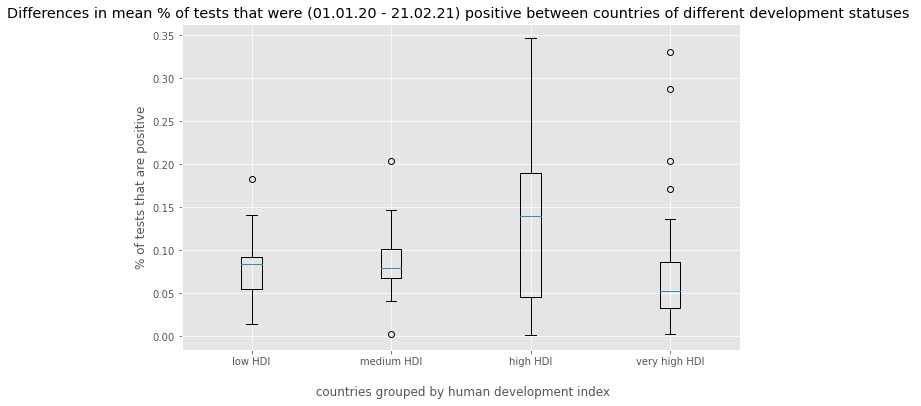

,count,mean,std,min,25%,50%,75%,max
hdi_class,,,,,,,,
1.0,13.0,0.080056,0.046574,0.014548,0.055132,0.083611,0.091788,0.182649
2.0,16.0,0.087542,0.045600,0.002471,0.068036,0.078878,0.101395,0.203521
3.0,29.0,0.132335,0.093253,0.001489,0.045311,0.139915,0.190090,0.346476
4.0,56.0,0.071110,0.062642,0.002364,0.032511,0.052619,0.086178,0.330647


In [45]:
#create boxplot to compare % of positive tests across different development categories
plt.figure(figsize = (10,6)) 
plt.boxplot(pos_rate.loc[pos_rate['hdi_class'] == 1,'positive_rate'], positions = [1])
plt.boxplot(pos_rate.loc[pos_rate['hdi_class'] == 2,'positive_rate'], positions = [2])
plt.boxplot(pos_rate.loc[pos_rate['hdi_class'] == 3,'positive_rate'], positions = [3])
plt.boxplot(pos_rate.loc[pos_rate['hdi_class'] == 4,'positive_rate'], positions = [4])
plt.ylabel('% of tests that are positive')
plt.title('Differences in mean % of tests that were (01.01.20 - 21.02.21) positive between countries of different development statuses ')
plt.xticks([1,2,3,4],['low HDI', 'medium HDI','high HDI','very high HDI'])
plt.xlabel('\n countries grouped by human development index')
plt.show()

# additional statistics related to boxplot
pos_rate.groupby('hdi_class')['positive_rate'].describe()

The statistics above indicate, that there is indeed a tendency for lower HDI countries to have a higher `positive_rate`. For instance, low HDI countries display a mean positive rate of 8%. Very high HDI countries on the other hand have a mean positive rate of 7%. The median shows an even higher difference. While this difference in the positive rate doesn't seem high enough to argue against a relationship between more development and a higher number of Covid-19 cases (as seen in this [boxplot](#boxplot1)), it makes more sense to use a variable that is less likely to be influenced by external factors like testing. <br> <br>

Reported Covid-19 deaths per 1 million people is a more robust metric. Deaths are recorded well in most countries no matter the development status and are not subject to external factors such as the number of tests, etc.. The discussed metric is represented in our dataset by `total_deaths_per_million`. 

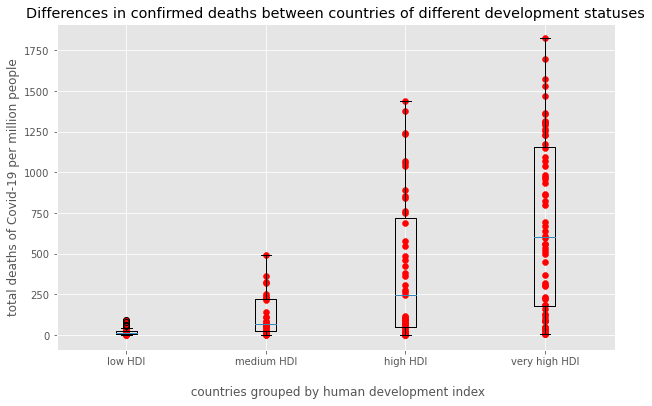

,count,mean,std,min,25%,50%,75%,max
hdi_class,,,,,,,,
1.0,33.0,21.842970,23.628165,0.168,6.6510,12.3500,22.86600,90.759
2.0,30.0,123.535333,128.240734,1.006,27.3440,65.4675,222.49325,494.758
3.0,47.0,397.630745,435.657300,0.360,46.4515,247.7900,719.79800,1439.886
4.0,64.0,677.446516,527.499159,4.957,177.7080,601.3275,1154.37950,1822.666


In [46]:
# choose a recent date at which to compare the data
covid_data_deaths = covid_data[covid_data['date']== '01.02.21']

# exclude NaN values
covid_data_deaths = covid_data_deaths[covid_data_deaths['hdi_class'].notna()]
covid_data_deaths = covid_data_deaths[covid_data_deaths['total_deaths_per_million'].notna()]

# create boxplot
plt.figure(figsize = (10,6))
plt.boxplot(covid_data_deaths.loc[covid_data_deaths['hdi_class']==1,'total_deaths_per_million'],positions = [1])
plt.boxplot(covid_data_deaths.loc[covid_data_deaths['hdi_class']==2,'total_deaths_per_million'],positions = [2])
plt.boxplot(covid_data_deaths.loc[covid_data_deaths['hdi_class']==3,'total_deaths_per_million'],positions = [3])
plt.boxplot(covid_data_deaths.loc[covid_data_deaths['hdi_class']==4,'total_deaths_per_million'],positions = [4])
plt.scatter(x = covid_data_deaths['hdi_class'], y = covid_data_deaths['total_deaths_per_million'], c = 'r')
plt.ylabel('total deaths of Covid-19 per million people')
plt.title('Differences in confirmed deaths between countries of different development statuses')
plt.xticks([1,2,3,4],['low HDI', 'medium HDI','high HDI','very high HDI'])
plt.xlabel('\n countries grouped by human development index')
plt.show()

# additional statistics related to boxplot
covid_data_deaths.groupby('hdi_class')['total_deaths_per_million'].describe()

Similarly to the `total_cases_per_million` variable, the total reported deaths per 1 million people (`total_deaths_per_million`) also increase significantly from the low HDI group to the very high HDI group. As a result, we can conculde that developing countries are indeed less affected by the virus compared to developed countries.

<br>

#### 3.1.2 What are the root-causes for this observation?  <a id='3.1.2'></a>

In order to understand the root-causes of why developing countries are less affected by the virus, which is specifically shown in the death rate, we will first analyze the relationship between several predictor variables and the `total_deaths_per_million` variable and for the once where we have found a significant relationship, we will investigate whether the developing countries display different metrics for these predictors than their developed counterparts. The dataset allows us to choose from the following country-characteristics variables:

| Variable | Description |
| :- | :-| 
'stringency_index': | Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)
'population_density': | Number of people divided by land area, measured in square kilometers, most recent year available
'median_age': | Median age of the population, UN projection for 2020
'gdp_per_capita': | Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available
'extreme_poverty': | Share of the population living in extreme poverty, most recent year available since 2010
'cardiovasc_death_rate': | Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)
'diabetes_prevalence': | Diabetes prevalence (% of population aged 20 to 79) in 2017
'female_smokers': | Share of women who smoke, most recent year available
'male_smokers': | Share of men who smoke, most recent year available
'handwashing_facilities':  | Share of the population with basic handwashing facilities on premises, most recent year available
'hospital_beds_per_thousand': | Hospital beds per 1,000 people, most recent year available since 2010
'life_expectancy': | Life expectancy at birth in 2019 

In [47]:
# filtering the dataset to only use the columns necessary for this part of the analysis
char = 'location','total_deaths_per_million','stringency_index', 'population_density','median_age','gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy','human_development_index'
covid_data_corr = covid_data.loc[covid_data['date']=='01.02.21',char]

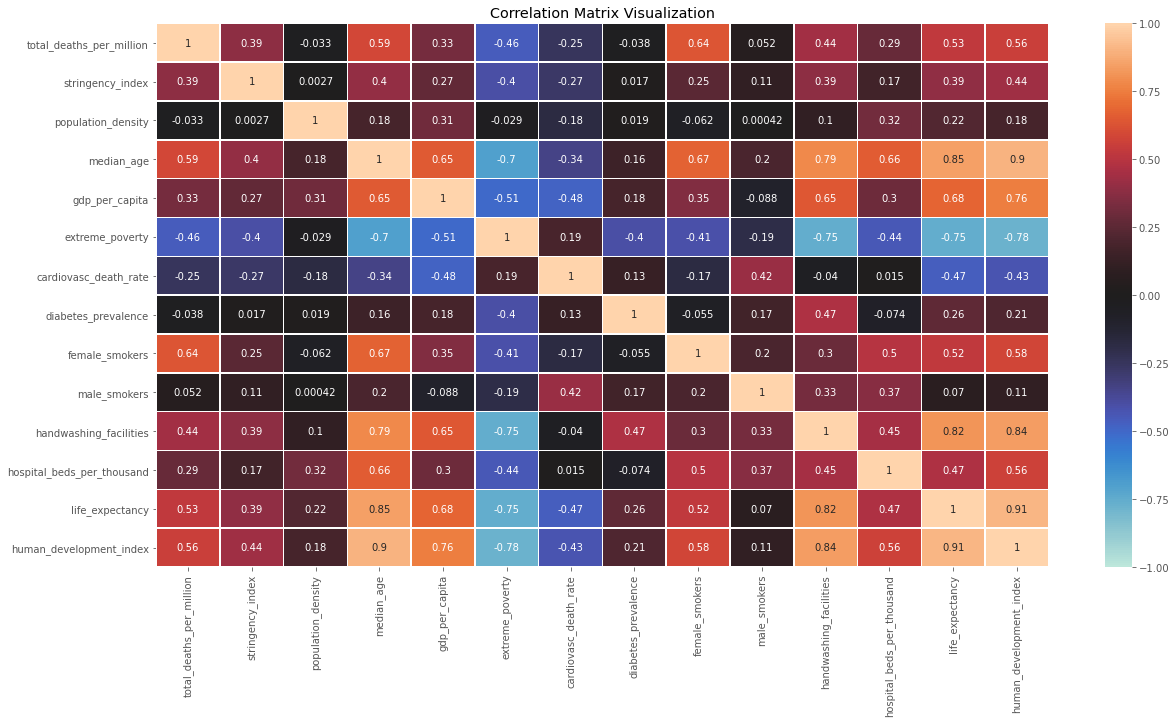

In [48]:
# creating heatmap of correlation matrix
plt.figure(figsize = (20,10))
covid_corr = covid_data_corr.corr()
sn.heatmap(covid_corr, center=0, annot=True, linewidths=.5, vmax = 1, vmin = -1)
plt.title('Correlation Matrix Visualization')
plt.show()

For the scope of this assignment, we decided to confine ourselves to the analysis of 3 predictor variables, namely `median_age`, `diabetes_prevalence`, and `stringency_index`. 
<br> <br>
1. `median_age` <br>
For this variable we hypothesize that there is a significant positive relationship between the median age of a given country and their mortality rate related to Covid-19. Furthermore, we hypothesisze that developing countries on average have a significantly younger population that developed countries, which then results in a lower mortality rate for developing countries.
<br><br>
2. `diabetes_prevalence` <br>
Here we hypothesize that a higher diabetes prevalence increases the mortality rate for a given country. Moreover, lesser developed countries have a lower diabetes prevalence than their developed counterparts and thus have a lower mortality rate.
<br><br>
3. `stringency_index` <br>
Our hypothesis is that a more stringent policy response to the Covid-19 pandemic reduces the mortality rate. We further hypothesize that developing countries have on average applied a more stringent response than developed countries and have therefore a lower mortality rate.
<br> <br> <br>
We first analyze `median_age` and `diabetes_prevalence`, as the variable `stringency_index` needs some further modification before we can use it.

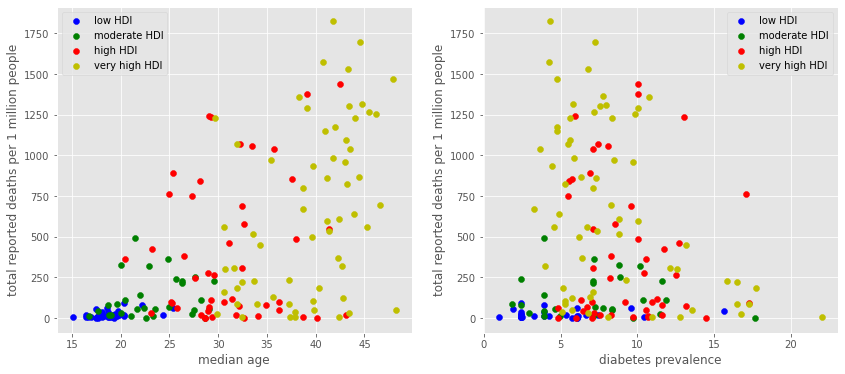

In [49]:
#filter dataset to only include necessary colums
fil = ['total_deaths_per_million','median_age', 'diabetes_prevalence','hdi_class']
covid_inf = covid_data.loc[covid_data['date']=='01.02.21',fil]


fig = plt.figure(figsize = (14,6))
fig1 = fig.add_subplot(1,2,1)
fig2 = fig.add_subplot(1,2,2)

#correlation between median age and total deaths per 1 million people
fig1.scatter(x = covid_inf.loc[covid_inf['hdi_class']==1,'median_age'],y=covid_inf.loc[covid_inf['hdi_class']==1,'total_deaths_per_million'], c='b', label = 'low HDI')
fig1.scatter(x = covid_inf.loc[covid_inf['hdi_class']==2,'median_age'],y=covid_inf.loc[covid_inf['hdi_class']==2,'total_deaths_per_million'], c='g', label = 'moderate HDI')
fig1.scatter(x = covid_inf.loc[covid_inf['hdi_class']==3,'median_age'],y=covid_inf.loc[covid_inf['hdi_class']==3,'total_deaths_per_million'], c='r', label = 'high HDI')
fig1.scatter(x = covid_inf.loc[covid_inf['hdi_class']==4,'median_age'],y=covid_inf.loc[covid_inf['hdi_class']==4,'total_deaths_per_million'], c='y', label = 'very high HDI')
fig1.set_xlabel('median age')
fig1.set_ylabel('total reported deaths per 1 million people')
fig1.legend()

fig2.scatter(x = covid_inf.loc[covid_inf['hdi_class']==1,'diabetes_prevalence'],y=covid_inf.loc[covid_inf['hdi_class']==1,'total_deaths_per_million'], c='b', label = 'low HDI')
fig2.scatter(x = covid_inf.loc[covid_inf['hdi_class']==2,'diabetes_prevalence'],y=covid_inf.loc[covid_inf['hdi_class']==2,'total_deaths_per_million'], c='g', label = 'moderate HDI')
fig2.scatter(x = covid_inf.loc[covid_inf['hdi_class']==3,'diabetes_prevalence'],y=covid_inf.loc[covid_inf['hdi_class']==3,'total_deaths_per_million'], c='r', label = 'high HDI')
fig2.scatter(x = covid_inf.loc[covid_inf['hdi_class']==4,'diabetes_prevalence'],y=covid_inf.loc[covid_inf['hdi_class']==4,'total_deaths_per_million'], c='y', label = 'very high HDI')
fig2.set_xlabel('diabetes prevalence')
fig2.set_ylabel('total reported deaths per 1 million people')
fig2.legend()



plt.show()

While there seems to be a strong positive relationship between `median_age` and `total_deaths_per_million`, the relationship between `diabetes_prevalence` and `total_deaths_per_million` is ambiguous. Before we further quantify our observations in the [3.1 Inferential Statistics](#inferential_stats) section, we will turn towards the `stringency_index` variable.

Since the Covid-19 pandemic spreads in waves, the policy responses of national governments differ from time to time. This implies that it won't suffice to simply choose any point in time when using the `stringency_index` variable. Instead we must calculate the average to account for the wave pattern.

In [50]:
# exclude NaN values for variables of interest
string_ind = covid_data[covid_data['hdi_class'].notna()]
string_ind = string_ind[string_ind['stringency_index'].notna()]

# calculating the mean stringency over the observed time period
string_ind = string_ind.groupby('location')[['stringency_index','hdi_class']].agg(count = ('stringency_index','count'), stringency_mean = ('stringency_index', 'mean'), hdi_class = ('hdi_class','mean'))
string_ind = string_ind.reset_index()

Next, we need to add back the `total_deaths_per_million` variable. Here we use the 01.02.21 as a date, just like we did for the other variables.

In [51]:
# filter 'total_deaths_per_million' to only include countries that have a 'stringency_index' and 'hdi_class'
string_ind_deaths = covid_data_corr.loc[covid_data_corr['location'].isin(string_ind['location']),['location','total_deaths_per_million']]

#sort both dataframes alphabetically
string_ind_deaths = string_ind_deaths.sort_values('location')
string_ind = string_ind.sort_values('location')

# add 'total_deaths_per_million' to the main dataset
string_ind_deaths_list = string_ind_deaths['total_deaths_per_million'].to_list()
string_ind['total_deaths_per_million'] = string_ind_deaths_list

In [52]:
# validating whether there are significant differences in the number of entries between the different development categories
string_ind.groupby('hdi_class')[['count']].mean()

,count
hdi_class,
1.0,330.125000
2.0,326.687500
3.0,352.609756
4.0,360.079365


Above we calculated the average number of observations available for the `stringency_index` variable for each of the four development categories. Since the average number of observations is quite similar, we can continue the analysis without problems.

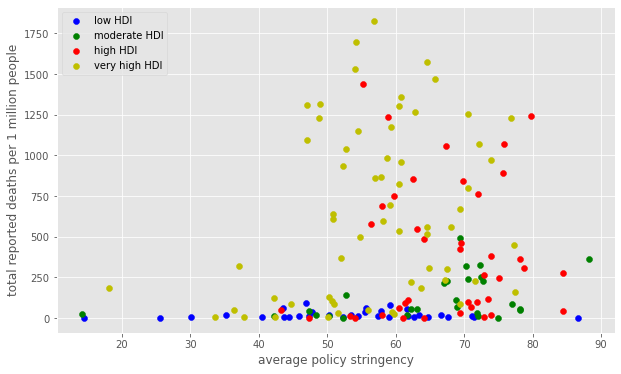

In [53]:
# correlation between the mean stringency_index and Covid-19 death rate
plt.scatter(x = string_ind.loc[string_ind['hdi_class']==1,'stringency_mean'],y=string_ind.loc[string_ind['hdi_class']==1,'total_deaths_per_million'], c='b', label = 'low HDI')
plt.scatter(x = string_ind.loc[string_ind['hdi_class']==2,'stringency_mean'],y=string_ind.loc[string_ind['hdi_class']==2,'total_deaths_per_million'], c='g', label = 'moderate HDI')
plt.scatter(x = string_ind.loc[string_ind['hdi_class']==3,'stringency_mean'],y=string_ind.loc[string_ind['hdi_class']==3,'total_deaths_per_million'], c='r', label = 'high HDI')
plt.scatter(x = string_ind.loc[string_ind['hdi_class']==4,'stringency_mean'],y=string_ind.loc[string_ind['hdi_class']==4,'total_deaths_per_million'], c='y', label = 'very high HDI')

plt.xlabel('average policy stringency')
plt.ylabel('total reported deaths per 1 million people')
plt.legend(loc = 2)
plt.show()

The scatterplot above doesn't suggest a significant relationship between the average policy stringency of a given country and the mortality rate.

### 3.2 Inferential statistics <a id='inferential_stats'></a>

Following the EDA, we use simple linear regression to quantify our prior observations. 

#### 1. Regression of  `stringency_index` 

In [54]:
# regression analysis of stringency_mean on total_deaths_per_million
string_ind_re = sm.ols(formula = 'total_deaths_per_million ~ stringency_mean', data = string_ind).fit()
string_ind_re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     total_deaths_per_million   R-squared:                       0.017
Model:                                  OLS   Adj. R-squared:                  0.011
Method:                       Least Squares   F-statistic:                     2.789
Date:                      Wed, 24 Mar 2021   Prob (F-statistic):             0.0969
Time:                              22:32:20   Log-Likelihood:                -1215.2
No. Observations:                       161   AIC:                             2434.
Df Residuals:                           159   BIC:                             2440.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         102.5346    168.870      0.607      0.545    -230.982     436.052
stringency_mean     4.5960      2.752      1.670      0.097      -0.839      10.031
==============================================================================
Omnibus:                       31.287   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.083
Skew:                           1.246   Prob(JB):                     4.41e-10
Kurtosis:                       3.459   Cond. No.                         285.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 1. Regression of  `diabetes_prevalence` 

In [55]:
# regression analysis of diabetes_prevalence on total_deaths_per_million
diab_pre = sm.ols(formula = 'total_deaths_per_million ~ diabetes_prevalence', data = covid_inf).fit()
diab_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     total_deaths_per_million   R-squared:                       0.001
Model:                                  OLS   Adj. R-squared:                 -0.004
Method:                       Least Squares   F-statistic:                    0.2526
Date:                      Wed, 24 Mar 2021   Prob (F-statistic):              0.616
Time:                              22:32:20   Log-Likelihood:                -1337.6
No. Observations:                       176   AIC:                             2679.
Df Residuals:                           174   BIC:                             2685.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             427.7911     82.446      5.189      0.000     265.068     590.514
diabetes_prevalence    -4.8371      9.624     -0.503      0.616     -23.832      14.158
==============================================================================
Omnibus:                       31.839   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.681
Skew:                           1.209   Prob(JB):                     3.27e-10
Kurtosis:                       3.338   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 1. Regression of  `median_age` 

In [56]:
# regression analysis of median_age on total_deaths_per_million
med_age = sm.ols(formula = 'total_deaths_per_million ~ median_age', data = covid_inf).fit()
med_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     total_deaths_per_million   R-squared:                       0.345
Model:                                  OLS   Adj. R-squared:                  0.341
Method:                       Least Squares   F-statistic:                     90.54
Date:                      Wed, 24 Mar 2021   Prob (F-statistic):           1.64e-17
Time:                              22:32:20   Log-Likelihood:                -1277.5
No. Observations:                       174   AIC:                             2559.
Df Residuals:                           172   BIC:                             2565.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -534.9504     98.951     -5.406      0.000    -730.266    -339.635
median_age    29.6312      3.114      9.515      0.000      23.484      35.778
==============================================================================
Omnibus:                        8.888   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.790
Skew:                           0.530   Prob(JB):                       0.0123
Kurtosis:                       3.301   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression output confirms the conclusions that we drew based on the scatterplots above. `median_age` does indeed have a significant positive relationship with Covid-19 related deaths. `diabetes prevalence` is not a significant predictor of `total_deaths_per_million` (p-value = 0.616). Moreover, the coefficient is actually negative which is contrary to our hypothesis that an increasing diabetes prevalence increases the mortality rate related to Covid-19. Similarly, `stringency_index` also doesn't show a significant relationship to `total_deaths_per_million` (p-value = 0.097).

By now we have established that the median age has a significant positive relationship with Covid-19 related deaths. In order to see whether this observation is one of the reasons why developing countries are less affected by the pandemic than developed countries, we are running a two sample t-test according to the following hypothesis:
\begin{align*} 
H_0: \mu_{Developing} &= \mu_{Developed} \\
H_A: \mu_{Developing} &< \mu_{Developed}
\end{align*}
<br>
, where $\mu$ is the average age of each category. In order to conduct this test, we first merge the lower two HDI categories (low HDI & moderate HDI) and the two highest (high HDI & very high HDI).


In [57]:
med_age = covid_inf[['hdi_class','median_age']] # create subset

#exclude all NaN values
med_age = med_age[med_age['median_age'].notna()]
med_age = med_age[med_age['hdi_class'].notna()]

#merge hdi classes
med_age['hdi_class'] = med_age['hdi_class'].replace(1,0).replace(2,0).replace(3,1).replace(4,1)

Now we can conduct the two sample t-test:

In [58]:
from scipy.stats import ttest_ind
t, pval = ttest_ind(med_age.loc[med_age['hdi_class']==0,'median_age'], med_age.loc[med_age['hdi_class']==1,'median_age'])
print(t, pval)

-16.94548726028744 5.636616819546104e-39


The output implies that we indeed have a significant difference in average age between developing and developed countries. To visualize this we can use the scatterplot that we already created during the EDA. Here the countries with low and medium HDI are all situated on the left half of the x-axis, which indicates a low median-age.

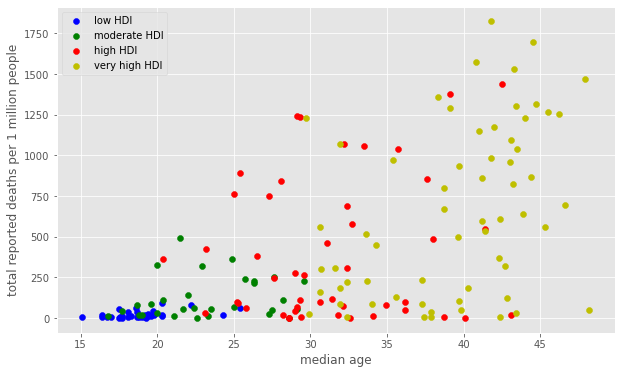

In [59]:
#correlation between median age and total deaths per 1 million people
plt.scatter(x = covid_inf.loc[covid_inf['hdi_class']==1,'median_age'],y=covid_inf.loc[covid_inf['hdi_class']==1,'total_deaths_per_million'], c='b', label = 'low HDI')
plt.scatter(x = covid_inf.loc[covid_inf['hdi_class']==2,'median_age'],y=covid_inf.loc[covid_inf['hdi_class']==2,'total_deaths_per_million'], c='g', label = 'moderate HDI')
plt.scatter(x = covid_inf.loc[covid_inf['hdi_class']==3,'median_age'],y=covid_inf.loc[covid_inf['hdi_class']==3,'total_deaths_per_million'], c='r', label = 'high HDI')
plt.scatter(x = covid_inf.loc[covid_inf['hdi_class']==4,'median_age'],y=covid_inf.loc[covid_inf['hdi_class']==4,'total_deaths_per_million'], c='y', label = 'very high HDI')
plt.xlabel('median age')
plt.ylabel('total reported deaths per 1 million people')
plt.legend()
plt.show()

## 4. Conclusion <a id='conclusion'></a>

The initial question stated in this report was whether developing countries are affected lesser by Covid-19. Our analysis shows that developing countries are indeed less impacted by the pandemic in comparison to their more developed counterparts. Impact is here measured solely in terms of the virus (cases, deaths) and not in terms of the economic impact, etc.. <br> 

We were also able to identify the median age as one of the substantial reasons for why developing countries are less affected by Covid-19 than developed countries. On the other hand, diabetes prevalence and the stringency of a country's policy response are, according to our analysis, not a root-cause for the impact differences of Covid-19 on developing and developed countries.

## 5. Ethical Considerations <a id='ethics'></a>

As already mentioned in the introduction, we downloaded the dataset from https://ourworldindata.org/coronavirus-source-data. The publisher, Our World In Data, is a project of the Global Change Data Lab, a non-profit organization based in the United Kingdom. All of their data is open source and publicly accessible. The dataset mostly uses reports from John Hopkins University, national governments, the World Bank and the OECD as its sources. For a full list please consult their [Github repository](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv). <br> <br>
The analysis conducted in this report is subject to several limitations. First, it is important to point out that the reponse variable `total_deaths_per_million`, while it is more robust than other measures (i.e. `total_cases_per_million`), is not completely free of manipulation. In order for a reported death to be assigned to Covid-19, it is often necessary to conduct a test post-mortem. It is quite likely that this is done more thoroughly in develoed countries vs developing countries. Moreover, developing countries could generally have a lesser developed reporting system, which increases the challenges in recording the deaths related to Covid-19. Also, political interests could lead to an understatement of the mortality rate related to Covid-19. <br>
Another limitation to consider is the `hdi_class` variable used in this dataset, which is a classification based on the human development index. Countries within the same HDI bracket can have very different general characteristics and just as different responses to the pandemic. For instance, take Brazil and China. Both countries are in the 'high HDI' bracket but their Covid-19 response could not have been more different. While the government of Brazil is mostly reluctant to impose restrictions related to the pandemic, China went as far as cutting off entire cities from the rest of the country. Using a different classification (i.e. more homogeneous categories) in future research could reveal interesting insights that we couldn't conclude from our research. <br> <br>
The real world implications of our research are twofold. First, our results can help researchers and governments understand why developing countries are less impacted by the coronavirus pandemic. Second, people can use our results and other existing research as a basis to conduct more in depth analyses of the differences in how countries are affected by the pandemic, which could ultimately help policy leaders in adopting the most efficient policy responses to reduce the spread and severity of the Covid-19 pandemic.